In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv
import urllib.request

from array_to_cmap import array_to_cmap

In [2]:
# download the most recent data
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
data_path, _ = urllib.request.urlretrieve(url, 'time_series_19-covid-Confirmed.csv')

In [3]:
# load data
with open(data_path, 'r') as f:
    reader = csv.reader(f, delimiter=',')
    headers = next(reader)
    data = list(reader)
for i, line in enumerate(data):
    if line[-1] == '':
        data[i][-1] = data[i][-2]
countries_list = np.array([x[1] for x in data])
raw_data = np.array([x[4:] for x in data], dtype=int)
days_data = mdates.datestr2num(headers[4:])

In [4]:
# all available countries
np.unique(countries_list)

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'H

In [5]:
def plot(countries=None, logscale=False, show_legend=True, color_by_max=False, cmap='viridis', **kwargs):
    """Do the plotting.

    Arguments:
    countries (str, list): country or list of them
    
    Keyword arguments:
    logscale (bool): plot y in logscale
    kwargs    (dic): optional kwargs for plt.subplots()
    """
    
    # make sure the countries listed are in the data
    
    if countries is not None:
        countries = np.array(countries, dtype=str, ndmin=1)
        for country in countries:
            assert country in countries_list, '{} not in\
                countries list, please select from \n{}'.format(
                country, np.unique(countries_list))
    else:
        
        countries = countries_list
        
    # initialize the plotting
    
    f, ax = plt.subplots()
    if logscale:
        ax.set_yscale('log')
    ax.set_ylabel('Confirmed cases')
    ax.set_xlabel('Date')
    
    if color_by_max:
        max_list = []
        use = []
        for country in countries:
            mask = countries_list == country
            this_max = np.sum(raw_data[mask].squeeze())
            if this_max>0:

                max_list.append(this_max)
                use.append(True)
            
            else:
                use.append(False)
            
        _, colors = array_to_cmap(max_list,cmap, use_log=True)
            
            
            
        
    
    # plot every country
    for i, country in enumerate(countries):
        mask = countries_list == country
        if np.sum(mask) > 1:
            plot_data = np.sum(raw_data[mask].squeeze(), axis=0)
        else:
            plot_data = raw_data[mask].squeeze()
        
        
        if color_by_max:
            if use[i]:
                ax.plot(days_data, plot_data, color=colors[i], label=country,**kwargs)
            
        else:
            
            ax.plot(days_data, plot_data, label=country,**kwargs)
    
    f.autofmt_xdate()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
    if show_legend:
        ax.legend()

<IPython.core.display.Javascript object>


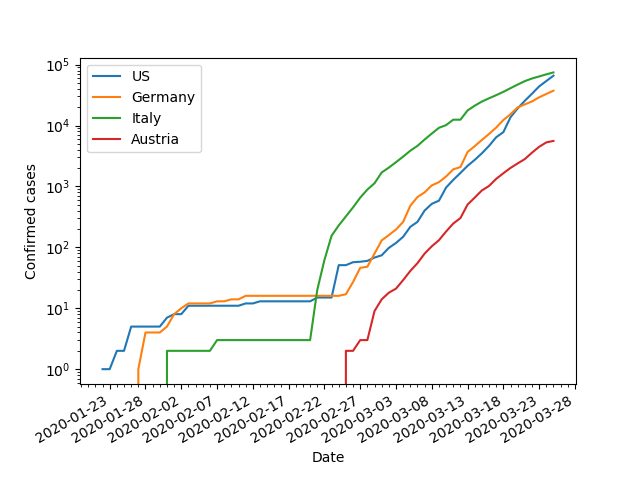

In [6]:
plot(['US', 'Germany', 'Italy', 'Austria'], logscale=True)

<IPython.core.display.Javascript object>


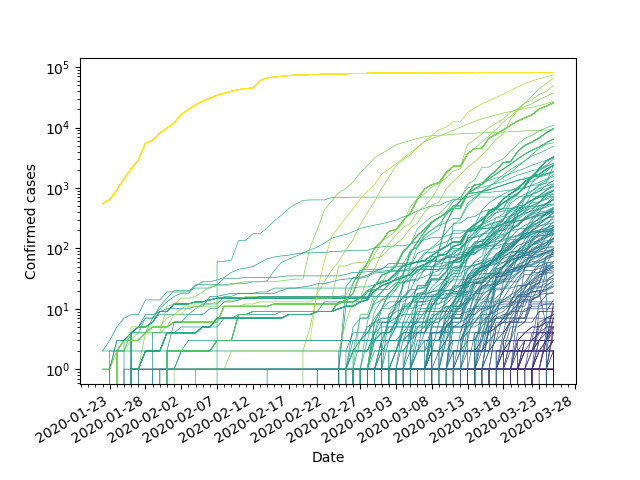

In [7]:
plot( logscale=True, color_by_max=True, show_legend=False, lw=.5)